In [ ]:
#install spacy
!pip install spacy

In [ ]:
#installing the english module
import sys
!{sys.executable} -m spacy download en

In [3]:
import spacy
import warnings
warnings.filterwarnings('ignore')

In [4]:
nlp = spacy.load('en')

### Tokenization

In [5]:
docx = nlp('Spacy is a cool tool. lets learn it')

In [6]:
docx

Spacy is a cool tool. lets learn it

In [7]:
for num, sentence in enumerate(docx.sents):
    print(f'{num}: {sentence}')

0: Spacy is a cool tool.
1: lets learn it


In [8]:
#word tokens
for token in docx:
    print(token.text)

Spacy
is
a
cool
tool
.
lets
learn
it


In [9]:
#list of word tokens
[token.text for token in docx]

['Spacy', 'is', 'a', 'cool', 'tool', '.', 'lets', 'learn', 'it']

In [10]:
#similar to splitting
docx.text.split(' ')

['Spacy', 'is', 'a', 'cool', 'tool.', 'lets', 'learn', 'it']

In [11]:
#word shape
for word in docx:
    print(word.text, word.shape_)

Spacy Xxxxx
is xx
a x
cool xxxx
tool xxxx
. .
lets xxxx
learn xxxx
it xx


In [12]:
example = nlp('Hello hello HELLo HeLlO Hello1 He!llo')

In [13]:
for word in example:
    print('Token =>', word.text, "shape ", word.shape_, word.is_alpha, word.is_stop)
    
# without _ prints the hash value of that word but we need the string representation

Token => Hello shape  Xxxxx True False
Token => hello shape  xxxx True False
Token => HELLo shape  XXXXx True False
Token => HeLlO shape  XxXxX True False
Token => Hello1 shape  Xxxxxd False False
Token => He!llo shape  Xx!xxx False False


### Parts of Speech Tagging

In [14]:
ex1 = nlp('He drinks a drink')

In [15]:
for word in ex1:
    print(word.text, word.pos_)

He PRON
drinks VERB
a DET
drink NOUN


In [16]:
#parts of speech simple term
ex2 = nlp('I fish a fish')
for word in ex2:
    print(word.text, word.pos_, word.tag_)

I PRON PRP
fish VERB VBP
a DET DT
fish NOUN NN


In [17]:
spacy.explain('DT')

'determiner'

In [18]:
ex3 = nlp('The rat was killed by the cat')
for word in ex3:
    print(word.text, word.pos_, word.tag_, word.dep_)

The DET DT det
rat NOUN NN nsubjpass
was AUX VBD auxpass
killed VERB VBN ROOT
by ADP IN agent
the DET DT det
cat NOUN NN pobj


In [19]:
spacy.explain('nsubjpass')

'nominal subject (passive)'

### Visualizing Dependency using displaCy

In [20]:
from spacy import displacy

In [21]:
displacy.render(ex3, style='dep')

In [22]:
## Customizing the Diplays
# Compact set it to square arrows or curved arrows
# Color:#09a3d5
options = {'compact': True, 'bg': 'cornflowerblue',
           'color': '#fff', 'font': 'Sans Serif'}

displacy.render(ex3,style='dep',options=options,jupyter=True)

In [23]:
#saving the image, in jupyter always jupyter=False
svg1 = displacy.render(ex3,style='dep',options=options, jupyter=False)

In [24]:
with open('doc1.svg', 'w', encoding='utf-8') as f:
    f.write(svg1)

In [25]:
!ls

doc1.svg  tutorial.ipynb


### Lemmatization (no stemming in spaCy)
root form always makes some meaning

In [26]:
doc = nlp('study studying studious studio student')
for word in doc:
    print(word.text, word.lemma_, word.pos_)

study study VERB
studying study VERB
studious studious ADJ
studio studio NOUN
student student NOUN


In [27]:
doc1 = nlp('good goods run running runner runny goose was be were')
for word in doc1:
    print(word.text, word.lemma_, word.pos_)

good good ADJ
goods good NOUN
run run VERB
running run VERB
runner runner NOUN
runny runny ADJ
goose goose NOUN
was be AUX
be be AUX
were be AUX


### Named Entity Recognition/Detection 

In [28]:
wikitext = nlp(u"By 2020 the telecom company Orange, will relocate from Turkey to Orange County in the U.S. close to Apple.It will cost them 2 billion dollars.")

In [29]:
for word in wikitext.ents:
    print(word.text, word.label_)

2020 DATE
Orange ORG
Turkey GPE
Orange County GPE
U.S. GPE
Apple ORG
2 billion dollars MONEY


In [30]:
spacy.explain('GPE')

'Countries, cities, states'

In [31]:
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [32]:
from spacy import displacy
displacy.render(wikitext, style='ent')

In [33]:
wikitext2 = nlp(u"Linus Benedict Torvalds is a Finnish-American software engineer who is the creator, and for a long time, principal developer of the Linux kernel, which became the kernel for operating systems such as the Linux operating systems, Android, and Chrome OS.")

In [34]:
displacy.render(wikitext2, style='ent', jupyter=True)

In [35]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [36]:
example = nlp("Facebook ,Explosion.ai, JCharisTech are all internet companies")

In [37]:
displacy.render(example, style='ent', jupyter=True)

### Semantic Similarity
for recommendation system

In [38]:
doc1 = nlp('wolf')
doc2 = nlp('dog')

In [39]:
doc1.similarity(doc2)

0.5298131414684126

In [40]:
#synonyms
doc3 = nlp('smart')
doc4 = nlp('clever')
doc3.similarity(doc4)

0.8309833399118612

In [41]:
similarword = nlp("wolf dog cat bird fish")
# Similarity Between Tokens
for token1 in similarword:
    for token2 in similarword:
        print((token1.text,token2.text),"similarity=>",token1.similarity(token2))


#for words not equal to 1 (or more)
#for token1 in similarword:
#    for token2 in similarword:
#        if len(token1) != 1 and len(token2)!= 1:
#            print((token1.text,token2.text, "Similarity =>",token1.similarity(token2)))

('wolf', 'wolf') similarity=> 1.0
('wolf', 'dog') similarity=> 0.4969794
('wolf', 'cat') similarity=> 0.44854474
('wolf', 'bird') similarity=> 0.29173735
('wolf', 'fish') similarity=> 0.06428725
('dog', 'wolf') similarity=> 0.4969794
('dog', 'dog') similarity=> 1.0
('dog', 'cat') similarity=> 0.4997991
('dog', 'bird') similarity=> 0.35256088
('dog', 'fish') similarity=> 0.20798585
('cat', 'wolf') similarity=> 0.44854474
('cat', 'dog') similarity=> 0.4997991
('cat', 'cat') similarity=> 1.0
('cat', 'bird') similarity=> 0.43328032
('cat', 'fish') similarity=> 0.19638108
('bird', 'wolf') similarity=> 0.29173735
('bird', 'dog') similarity=> 0.35256088
('bird', 'cat') similarity=> 0.43328032
('bird', 'bird') similarity=> 1.0
('bird', 'fish') similarity=> 0.36580095
('fish', 'wolf') similarity=> 0.06428725
('fish', 'dog') similarity=> 0.20798585
('fish', 'cat') similarity=> 0.19638108
('fish', 'bird') similarity=> 0.36580095
('fish', 'fish') similarity=> 1.0


In [42]:
#[x for b in a for x in b] 
mylist = [(token1.text,token2.text,token1.similarity(token2)) for token2 in similarword for token1 in similarword]

In [43]:
mylist

[('wolf', 'wolf', 1.0),
 ('dog', 'wolf', 0.4969794),
 ('cat', 'wolf', 0.44854474),
 ('bird', 'wolf', 0.29173735),
 ('fish', 'wolf', 0.06428725),
 ('wolf', 'dog', 0.4969794),
 ('dog', 'dog', 1.0),
 ('cat', 'dog', 0.4997991),
 ('bird', 'dog', 0.35256088),
 ('fish', 'dog', 0.20798585),
 ('wolf', 'cat', 0.44854474),
 ('dog', 'cat', 0.4997991),
 ('cat', 'cat', 1.0),
 ('bird', 'cat', 0.43328032),
 ('fish', 'cat', 0.19638108),
 ('wolf', 'bird', 0.29173735),
 ('dog', 'bird', 0.35256088),
 ('cat', 'bird', 0.43328032),
 ('bird', 'bird', 1.0),
 ('fish', 'bird', 0.36580095),
 ('wolf', 'fish', 0.06428725),
 ('dog', 'fish', 0.20798585),
 ('cat', 'fish', 0.19638108),
 ('bird', 'fish', 0.36580095),
 ('fish', 'fish', 1.0)]

In [44]:
### As its a list now, we can pass it thru' the dataframe
import pandas as pd

In [45]:
df = pd.DataFrame(mylist)

In [46]:
df.head()

,0,1,2
0,wolf,wolf,1.000000
1,dog,wolf,0.496979
2,cat,wolf,0.448545
3,bird,wolf,0.291737
4,fish,wolf,0.064287


In [47]:
df.corr()

,2
2,1.0


In [48]:
df.columns = ['Token1', 'Token2', 'Similarity']

In [49]:
df.head()

,Token1,Token2,Similarity
0,wolf,wolf,1.000000
1,dog,wolf,0.496979
2,cat,wolf,0.448545
3,bird,wolf,0.291737
4,fish,wolf,0.064287


In [50]:
df.dtypes

Token1         object
Token2         object
Similarity    float64
dtype: object

In [51]:
# Visualization Package with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# Encoding it
df_viz = df.replace({'wolf':0,'dog':1,'cat':2,'fish':3,'bird':4})
df_viz.head()

,Token1,Token2,Similarity
0,0,0,1.000000
1,1,0,0.496979
2,2,0,0.448545
3,4,0,0.291737
4,3,0,0.064287


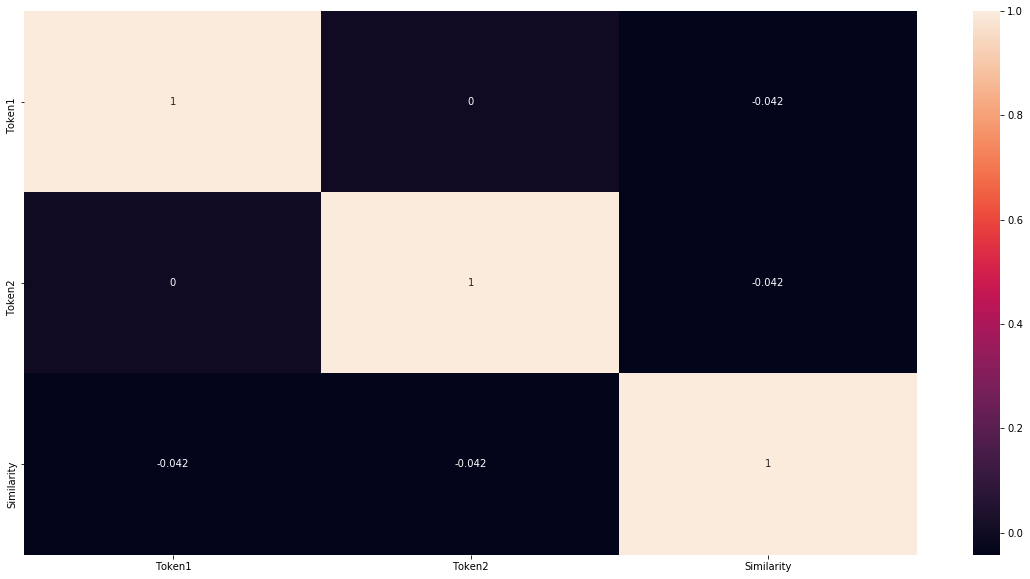

In [53]:
# Plotting with Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_viz.corr(),annot=True)
plt.xlim(0,3)
plt.ylim(3,0)
plt.show()

### Stop Words

In [54]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'nor', 'ourselves', 'will', 'amount', '‘d', 'out', 'neither', "'re", 'together', 'hers', 'top', 'somewhere', 'amongst', "'s", 'ours', 'name', 'ten', 'may', 'call', 'full', 'hundred', 'he', 'becoming', 'herself', 're', 'him', 'anyway', 'be', 'two', 'please', 'we', 'indeed', 'though', 'done', 'anyone', 'n’t', 'yourself', 'put', 'hence', 'around', 'with', 'themselves', "'d", 'over', 'before', 'those', 'whereas', 'four', '’s', 'whole', 'while', 'per', 'its', 'thru', 'see', 'when', 'us', 'beside', 'is', 'often', 'only', 'throughout', '’ve', 'give', 'except', 'from', 'move', 'otherwise', 'everywhere', 'first', 'along', 'being', 'whatever', 'whenever', 'through', 'most', 'former', 'hereby', 'within', 'or', 'next', 'without', 'our', 'just', 'few', 'has', 'someone', 'one', 'whereby', 'can', 'it', 'mine', 'side', 'formerly', 'your', 'latterly', 'made', 'once', 'besides', 'they', 'very', 'cannot', 'anywhere', 'where', 'so', 'all', 'you', 'for', 'seems', 'back', 'now', 'eleven', 'whether', 'there

In [55]:
len(STOP_WORDS)

326

In [56]:
# Checking if a given word is stop word or not
nlp.vocab['the'].is_stop

True

In [57]:
nlp.vocab['spacy'].is_stop

False

In [58]:
# Filtering the stop word from a sentence
mysentence = nlp(u"This is a sentence to check if it has stop words or not")
for word in mysentence:
    if word.is_stop == True: # if word.is_stop: -> can also be used
        print(word)

This
is
a
to
if
it
has
or
not


In [59]:
#to print the list of non-stop words in above sentence
[ word for word in mysentence if word.is_stop == False]

[sentence, check, stop, words]

In [60]:
# Filtering Stop Words (another way of doing it)
filteredwords = []
for word in mysentence:
    if word.is_stop == False:
        filteredwords.append(word)
print(filteredwords)

[sentence, check, stop, words]


In [61]:
#addingown stop words and cheking
stoplist = STOP_WORDS.add("lol")
example = nlp(u"There are a lot of lol in this sentence but what does it mean.")
for word in example:
    if word.is_stop:
        print(word)

There
are
a
of
lol
in
this
but
what
does
it


In [62]:
#there were 326 before adding so not it shows 327
len(STOP_WORDS)

327

In [63]:
#Removing Stop Words
STOP_WORDS.remove("lol")
# the last word added can also removed using .pop
#STOP_WORDS.pop("lol")

In [64]:
len(STOP_WORDS)

326

### Noun Chunks

In [65]:
# Noun Phrase or Chunks
document= nlp("The man reading the news is very tall.")

In [66]:
for word in document.noun_chunks:
    print(word.text)

The man
the news


In [67]:
# Root text
# the main noun 
for word in document.noun_chunks:
    print(word.root.text)

man
news


In [68]:
# Text of the root token head
for token in document.noun_chunks:
    print(token.root.text," -> connector_text to root head :",token.root.head.text)

man  -> connector_text to root head : is
news  -> connector_text to root head : reading


### Sentence Segmentation or Boundary Detection
Deciding where sentences begin and end
* If it's a period, it ends a sentence.
* If the preceding token is in the hand-compiled list of abbreviations, then it doesn't end a sentence.
* If the next token is capitalized, then it ends a sentence.

In [69]:
# Default sentence segmenter
mydoc = nlp(u"This is my first sentence...this is second sentence---the last sentence is last what if...? this is the last sentence. Test")
for sentence in mydoc.sents:
    print(sentence.text)

This is my first sentence...
this is second sentence---the last sentence is last what if...?
this is the last sentence.
Test


In [70]:
#Custom segmenter
#lets make a custom sentence segmenter which segments with --- too.
def custom_boundary(docx):
    for token in docx[:-1]:
        if token.text == '---':
            docx[token.i+1].is_sent_start = True
    return docx

In [71]:
# Adding the rule before parsing
nlp.add_pipe(custom_boundary,before='parser')

In [72]:
mydoc1 = nlp(u"This is my first sentence...this is second sentence---the last sentence is last what if...? this is the last sentence. Test")
for sentence in mydoc1.sents:
    print(sentence.text)

This is my first sentence...
this is second sentence---
the last sentence is last what if...?
this is the last sentence.
Test
